# <b> <font color = Blue>Assignment Train Linear Regression</font> </b>


## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task. 
- make `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [1]:
#lets inport dependency
import numpy as np
from Gradient_Descent import *
import matplotlib.pyplot as plt

In [2]:
def load_data():
    data = np.loadtxt("./Assignment_Data/data/ex1data1.txt",delimiter=",")
    X_Train = data[:,0]
    Y_Train = data[:,1]
    return X_Train, Y_Train

#lets Load data 
X_Train,Y_Train = load_data()
print(f"X_Train : shape{X_Train.shape} = \n",X_Train)
print(f"\nY_Train : shape{Y_Train.shape} = \n",Y_Train)

X_Train : shape(97,) = 
 [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]

Y_Train : shape(97,) = 
 [17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6

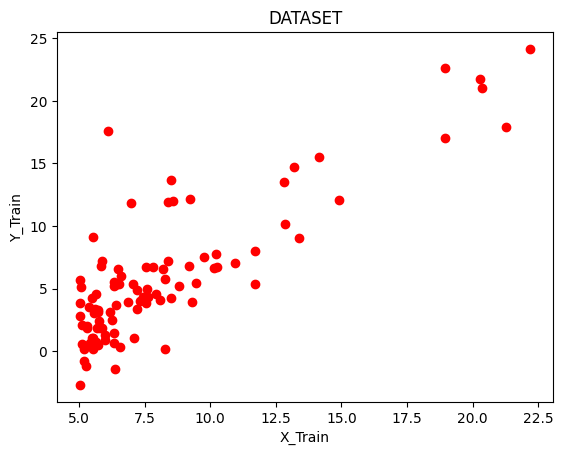

In [14]:
# now we have data its time to plot it to see it trends 
plt.scatter(X_Train,Y_Train,marker="o",label="Datapoints", c="RED")
plt.title("DATASET")
plt.xlabel("X_Train")
plt.ylabel("Y_Train")
plt.show()

By seeing the data we can conclude that we can implement the linear regression on the dataset for pridection 

for implementing linear regression we will use gradient descent algorithm to choose the Parameters of the regression

In [6]:
def compute_cost(x,y,w,b):
    """"
    Parameter
    x = array of input values 
    y = array of Target values 
    w = slope of line
    b = constant
    
    Return
    Total_Cost = amount of error in cost 
    """
    length_of_data = X_Train.shape[0]
    
    Total_Cost = 0
    for i in range(0,length_of_data):
        yhat = np.dot(x[i],w) + b
        Total_Cost += (yhat - y[i])**2
    
    Total_Cost = (1/(2*length_of_data))*Total_Cost
    return Total_Cost
        

In [7]:
def compute_gradient(x,y,w,b):
    """"
    Parameter
    x = array of input values 
    y = array of Target values 
    w = slope of line
    b = constant
    
    Return
    dj_dw = partial derivative of the cost with respect to the w 
    dj_db = partial derivative of the cost with respect to the b

    """
    dj_dw = 0
    dj_db = 0
    
    len_of_data = x.shape[0]
    
    for i in range(0,len_of_data):
        f_wb = np.dot(x[i],w)+b
        error = f_wb - y[i]
        dj_dw += error * x[i] 
        dj_db += error
    
    dj_dw = (1/len_of_data)*dj_dw
    dj_db = (1/len_of_data)*dj_db
    return dj_dw,dj_db

In [8]:
def compute_gradient_descent(x, y, w, b, iteration, alpha, compute_cost, compute_gradient):
    """"
    Parameter
    x = array of input values 
    y = array of Target values 
    w = slope of line
    b = constant
    iteration = how many times did you want to run gradient descent
    alpha = size of steps youu want to take towords the local min
    
    Return
    w = optimal parameter W 
    b = optimal parameter b 
    J_History = history of cost

    """
    J_History = []
    len_of_data = x.shape[0]
    for i in range(0,iteration):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha *dj_dw
        b -= alpha *dj_db
        
        if(i<10000):
            J_History.append(compute_cost(x, y, w, b,))
        
        
        if(i%100==0):
            print(f"Iteration {i}",f"Cost : {J_History[-1]} ")
    
    return w ,b ,J_History

In [9]:
w = 2
b = 1
print(compute_cost(X_Train,Y_Train,w,b))

75.20338497891959


In [10]:
w = 0
b = 0
iteration = 2000
w,b,J_History = compute_gradient_descent(X_Train, Y_Train, w, b, iteration , 0.01, compute_cost, compute_gradient)


Iteration 0 Cost : 6.737190464870008 
Iteration 100 Cost : 5.476362817272741 
Iteration 200 Cost : 5.173634551165022 
Iteration 300 Cost : 4.962606493117519 
Iteration 400 Cost : 4.815501494116685 
Iteration 500 Cost : 4.712956453749759 
Iteration 600 Cost : 4.6414735988143185 
Iteration 700 Cost : 4.591643801766726 
Iteration 800 Cost : 4.556908078409752 
Iteration 900 Cost : 4.532694243543437 
Iteration 1000 Cost : 4.515815084502823 
Iteration 1100 Cost : 4.504048835517842 
Iteration 1200 Cost : 4.49584673167822 
Iteration 1300 Cost : 4.490129148489065 
Iteration 1400 Cost : 4.486143493324961 
Iteration 1500 Cost : 4.483365143354072 
Iteration 1600 Cost : 4.481428390613829 
Iteration 1700 Cost : 4.480078304693717 
Iteration 1800 Cost : 4.479137176818275 
Iteration 1900 Cost : 4.478481128440361 


In [11]:
print("so our final output is")
print(f"W is {w} \nb is {b}")

so our final output is
W is 1.182212774757377 
b is -3.7880685727231103


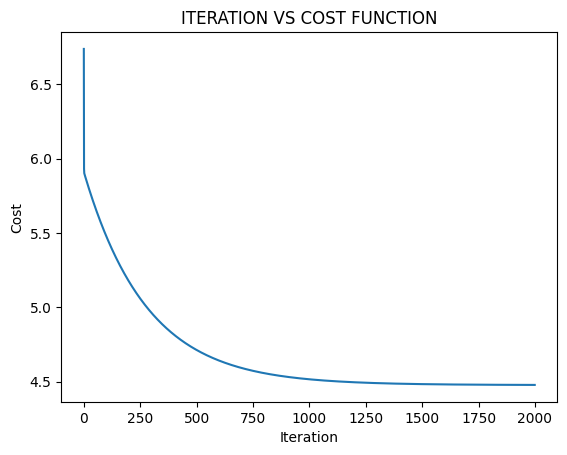

In [10]:
# ploting the cost garph with respect to w 
plt.plot(np.arange(iteration),J_History)
plt.title("ITERATION VS COST FUNCTION")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [11]:
def pridect(x,w=w,b=b):
    return np.dot(x,w)+b

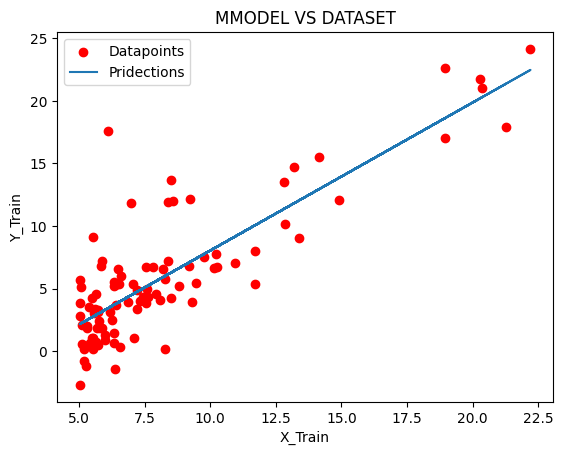

In [12]:
yhat = (X_Train * w)+b

plt.scatter(X_Train,Y_Train,marker="o",label="Datapoints", c="RED")
plt.plot(X_Train,yhat,label="Pridections", )
plt.title("MMODEL VS DATASET")
plt.xlabel("X_Train")
plt.ylabel("Y_Train")
plt.legend()
plt.show()

In [13]:
print(f'For population = 35,000, we predict a profit of:  {pridect(3.5)*10000}$')
print(f'For population = 70,000, we predict a profit of:  {pridect(7.0)*10000}$')

For population = 35,000, we predict a profit of:  3496.761389277094$
For population = 70,000, we predict a profit of:  44874.20850578529$
